# 1. Load the data



In [1]:


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np

# Download the data
!wget https://amazon-visual-anomaly.s3.us-west-2.amazonaws.com/VisA_20220922.tar

# Define the data directory
!mkdir VisA
data_dir = 'VisA'

# Extract the data into a file named VisA
!tar -xvf VisA_20220922.tar -C VisA




'wget' is not recognized as an internal or external command,
operable program or batch file.
A subdirectory or file VisA already exists.
x candle/
x candle/image_anno.csv
x candle/Data/
x candle/Data/Images/
x candle/Data/Images/Anomaly/
x candle/Data/Images/Anomaly/001.JPG
x candle/Data/Images/Anomaly/098.JPG
x candle/Data/Images/Anomaly/089.JPG
x candle/Data/Images/Anomaly/010.JPG
x candle/Data/Images/Anomaly/045.JPG
x candle/Data/Images/Anomaly/081.JPG
x candle/Data/Images/Anomaly/009.JPG
x candle/Data/Images/Anomaly/063.JPG
x candle/Data/Images/Anomaly/027.JPG
x candle/Data/Images/Anomaly/054.JPG
x candle/Data/Images/Anomaly/090.JPG
x candle/Data/Images/Anomaly/018.JPG
x candle/Data/Images/Anomaly/072.JPG
x candle/Data/Images/Anomaly/036.JPG
x candle/Data/Images/Anomaly/041.JPG
x candle/Data/Images/Anomaly/005.JPG
x candle/Data/Images/Anomaly/023.JPG
x candle/Data/Images/Anomaly/050.JPG
x candle/Data/Images/Anomaly/014.JPG
x candle/Data/Images/Anomaly/032.JPG
x candle/Data/Images/A

In [2]:
# Define the image directory
image_dir = os.path.join(data_dir, '')


# Define the image annotation file
image_anno_file = os.path.join(data_dir, 'macaroni1/image_anno.csv')


In [3]:
import pandas as pd

# Load the image annotation file
image_anno = pd.read_csv(image_anno_file)

# Display the first few rows of the image annotation file
image_anno.head()

,image,label,mask
0,macaroni1/Data/Images/Normal/0000.JPG,normal,NaN
1,macaroni1/Data/Images/Normal/0001.JPG,normal,NaN
2,macaroni1/Data/Images/Normal/0002.JPG,normal,NaN
3,macaroni1/Data/Images/Normal/0003.JPG,normal,NaN
4,macaroni1/Data/Images/Normal/0004.JPG,normal,NaN


In [4]:
image_anno['label'].unique()

array(['normal', 'chip around edge and corner',
       'chip around edge and corner,small scratches',
       'chip around edge and corner,small cracks',
       'different colour spot', 'middle breakage,small scratches',
       'similar colour spot', 'different colour spot,similar colour spot',
       'small cracks', 'small cracks,small scratches', 'small scratches'],
      dtype=object)

# 2. Preprocess the data

In [5]:
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

def resize_image(image, size=(256, 256)):
    # This function resizes the image to the given size.
    image = cv2.resize(image, size)
    return image

def normalize_image(image):

    #This function normalizes the image.

    image = image / 255.0
    return image

In [6]:
# for each image in the image directory we will resize the image to the size (256, 256) and normalize the image.
# We will store the resized and normalized image in the image list respectively.

images = []

for image in image_anno['image']:
    image_path = os.path.join(image_dir, image)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = resize_image(image)
    image = normalize_image(image)
    images.append(image)

# Convert the images list to a numpy array
images = np.array(images)

# Display the shape of the images array
images.shape

(1100, 256, 256, 3)

In [7]:
# Define the labels
labels = np.where(image_anno['label'] == 'normal', 0, 1)

# Display the labels
labels

image_anno['label'] = labels


In [8]:
image_anno

,image,label,mask
0,macaroni1/Data/Images/Normal/0000.JPG,0,NaN
1,macaroni1/Data/Images/Normal/0001.JPG,0,NaN
2,macaroni1/Data/Images/Normal/0002.JPG,0,NaN
3,macaroni1/Data/Images/Normal/0003.JPG,0,NaN
4,macaroni1/Data/Images/Normal/0004.JPG,0,NaN
...,...,...,...
1095,macaroni1/Data/Images/Anomaly/095.JPG,1,macaroni1/Data/Masks/Anomaly/095.png
1096,macaroni1/Data/Images/Anomaly/096.JPG,1,macaroni1/Data/Masks/Anomaly/096.png
1097,macaroni1/Data/Images/Anomaly/097.JPG,1,macaroni1/Data/Masks/Anomaly/097.png
1098,macaroni1/Data/Images/Anomaly/098.JPG,1,macaroni1/Data/Masks/Anomaly/098.png


# 3. Feature extraction

In [9]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
labels_train, labels_val = train_test_split(labels, test_size=0.2, random_state=42)

In [10]:


# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
images_train, images_val = train_test_split(images, test_size=0.2, random_state=42)
labels_train, labels_val = train_test_split(labels, test_size=0.2, random_state=42)
# Display the shape of the training and validation sets
print("Training set shape:", images_train.shape)
print("Validation set shape:", images_val.shape)

# Data Augmentation (Optional): We can use data augmentation to increase the diversity of the training data.
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Use the data generator to create batches of augmented images during training
# Define the batch size
batch_size = 32

# Create a data generator for the training set
train_datagen = datagen.flow(images_train, batch_size=batch_size)

# Create a data generator for the validation set
val_datagen = datagen.flow(images_val, batch_size=batch_size)







Training set shape: (880, 256, 256, 3)
Validation set shape: (220, 256, 256, 3)


In [11]:
print(images_val)

[[[[0.19215686 0.32156863 0.2       ]
   [0.22745098 0.33333333 0.21960784]
   [0.10980392 0.31372549 0.16470588]
   ...
   [0.10196078 0.28235294 0.14117647]
   [0.09019608 0.29019608 0.14509804]
   [0.09019608 0.28627451 0.14117647]]

  [[0.18431373 0.32941176 0.20392157]
   [0.21176471 0.34117647 0.21960784]
   [0.12156863 0.32156863 0.17647059]
   ...
   [0.13333333 0.30980392 0.16862745]
   [0.09803922 0.29411765 0.15294118]
   [0.09019608 0.28627451 0.14117647]]

  [[0.15294118 0.32156863 0.18431373]
   [0.16078431 0.32156863 0.18823529]
   [0.12156863 0.30588235 0.16470588]
   ...
   [0.14901961 0.31764706 0.18431373]
   [0.10196078 0.29803922 0.15294118]
   [0.10588235 0.30196078 0.15294118]]

  ...

  [[0.2745098  0.37647059 0.27058824]
   [0.19607843 0.31372549 0.20392157]
   [0.14117647 0.31764706 0.18823529]
   ...
   [0.10980392 0.29019608 0.14901961]
   [0.12941176 0.31764706 0.16862745]
   [0.11372549 0.30196078 0.15294118]]

  [[0.25098039 0.37254902 0.25098039]
   [0.1

In [12]:
# load a pre-trained model
# model : vgg16

from tensorflow.keras.applications import VGG16  # Import the VGG16 model

# Load the pre-trained model without the top layers (classification head)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the base model layers (optional, to prevent retraining pre-trained weights)
base_model.trainable = False

# Use the base model for feature extraction
def extract_features(img):
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    features = base_model.predict(img)  # Pass the image through the model
    return features.flatten()  # Flatten the feature vector

# Extract features from the images
features_train = np.array([extract_features(img) for img in images_train])
features_train = np.asarray(features_train).astype('float32')
features_val = np.array([extract_features(img) for img in images_val])
features_val = np.asarray(features_val).astype('float32')

# Display the shape of the extracted features
features_train.shape, features_val.shape





1/1 [==============================] - 0s 371ms/step


((880, 32768), (220, 32768))

# 4. Train the model

In [13]:
# Define the model

from tensorflow.keras.models import Sequential


model = Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(features_train.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               16777728  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16909313 (64.50 MB)
Trainable params: 16909313 (64.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
print("feature train :")
print(features_train)
print("feature val :")
print(features_val)

feature train :
[[0.11271052 0.         0.         ... 0.         0.5940152  0.        ]
 [0.29417938 0.         0.         ... 0.         0.6054779  0.        ]
 [0.15287717 0.         0.         ... 0.         0.6102123  0.        ]
 ...
 [0.28107023 0.         0.         ... 0.         0.54931456 0.        ]
 [0.24549069 0.         0.         ... 0.         0.5602465  0.        ]
 [0.19606438 0.         0.         ... 0.         0.59145856 0.        ]]
feature val :
[[0.06038633 0.         0.         ... 0.         0.61634016 0.        ]
 [0.1333587  0.         0.         ... 0.         0.60617715 0.        ]
 [0.07780779 0.         0.         ... 0.         0.5839372  0.        ]
 ...
 [0.23147887 0.         0.         ... 0.         0.5941532  0.        ]
 [0.24187277 0.         0.         ... 0.         0.5635117  0.        ]
 [0.11415218 0.         0.         ... 0.         0.5524947  0.        ]]


In [15]:
# Train the model
# Train the model
history = model.fit(features_train, labels_train, validation_data=(features_val, labels_val), epochs=15, batch_size=32)



Epoch 1/15
28/28 [==============================] - 9s 249ms/step - loss: 1.5041 - accuracy: 0.8466 - val_loss: 0.5497 - val_accuracy: 0.7682
Epoch 2/15
28/28 [==============================] - 6s 218ms/step - loss: 0.2979 - accuracy: 0.8955 - val_loss: 0.2328 - val_accuracy: 0.9227
Epoch 3/15
28/28 [==============================] - 6s 214ms/step - loss: 0.2161 - accuracy: 0.9205 - val_loss: 0.1787 - val_accuracy: 0.9364
Epoch 4/15
28/28 [==============================] - 6s 216ms/step - loss: 0.1891 - accuracy: 0.9205 - val_loss: 0.1725 - val_accuracy: 0.9273
Epoch 5/15
28/28 [==============================] - 6s 215ms/step - loss: 0.1797 - accuracy: 0.9273 - val_loss: 0.1621 - val_accuracy: 0.9318
Epoch 6/15
28/28 [==============================] - 6s 212ms/step - loss: 0.1555 - accuracy: 0.9307 - val_loss: 0.2137 - val_accuracy: 0.9182
Epoch 7/15
28/28 [==============================] - 6s 215ms/step - loss: 0.3124 - accuracy: 0.8943 - val_loss: 0.2325 - val_accuracy: 0.9091
Epoch 

5: Showing the results

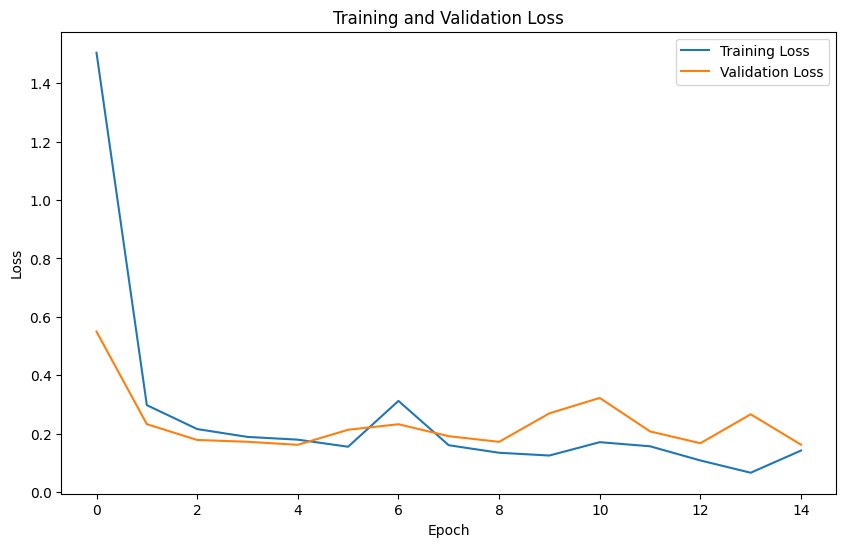

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


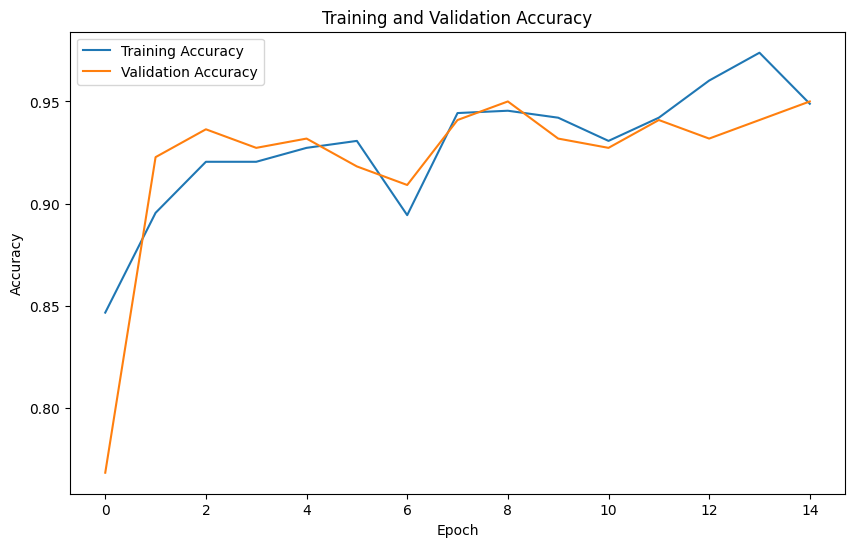

In [17]:
# Plot the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

7/7 [==============================] - 0s 10ms/step


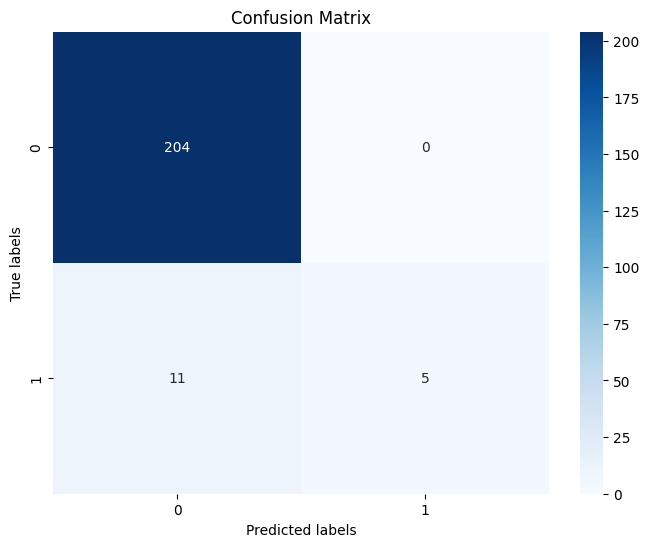

In [19]:
# Predict the labels for the validation set
preds = model.predict(features_val)

# Convert the predictions to binary labels
pred_labels = np.where(preds > 0.5, 1, 0)

# Display the predicted labels
pred_labels

# Display the true labels
labels_val

# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels_val, pred_labels)

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()